In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'

### DataAnalysis

##### 공공건축물 내진설계 현황

In [2]:
df_pu = pd.read_csv('..\dataset\EDA후 데이터셋\대책현황\내진설계\국내공공건축물_내진설계현황_EDA.csv', )
df_pu

,지역,전체 공공건축물(동수),전체 공공건축물(연면적),내진설계 대상(동수),내진설계 대상(연면적),내진설계 적용(동수),내진설계 적용(연면적),내진율(동수),내진율(연면적)
0,총 합계,170641,2.426909e+08,57856,2.284054e+08,18823,1.385515e+08,0.325342,0.606603
1,서울,11364,3.356134e+07,5954,3.284602e+07,2083,2.065292e+07,0.349849,0.628780
2,부산,7750,1.632259e+07,3068,1.583060e+07,943,9.760948e+06,0.307366,0.616587
3,대구,3777,1.189830e+07,1945,1.164489e+07,712,7.900901e+06,0.366067,0.678487
4,인천,5728,1.069201e+07,2266,1.023375e+07,780,6.176574e+06,0.344219,0.603550
5,광주,2544,6.417313e+06,1185,6.245197e+06,478,3.955410e+06,0.403376,0.633352
6,대전,2954,9.010625e+06,1482,8.817213e+06,511,5.492047e+06,0.344804,0.622878
7,울산,3387,4.877625e+06,1147,4.639943e+06,399,2.966773e+06,0.347864,0.639399
8,세종,848,1.634185e+06,336,1.557345e+06,163,1.280727e+06,0.485119,0.822378
9,경기,22075,4.721931e+07,9153,4.542438e+07,3672,3.006641e+07,0.401180,0.661900


In [3]:
df_pu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지역             18 non-null     object 
 1   전체 공공건축물(동수)   18 non-null     int64  
 2   전체 공공건축물(연면적)  18 non-null     float64
 3   내진설계 대상(동수)    18 non-null     int64  
 4   내진설계 대상(연면적)   18 non-null     float64
 5   내진설계 적용(동수)    18 non-null     int64  
 6   내진설계 적용(연면적)   18 non-null     float64
 7   내진율(동수)        18 non-null     float64
 8   내진율(연면적)       18 non-null     float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.4+ KB


##### 전국 공공 건축물 내진설계 현황

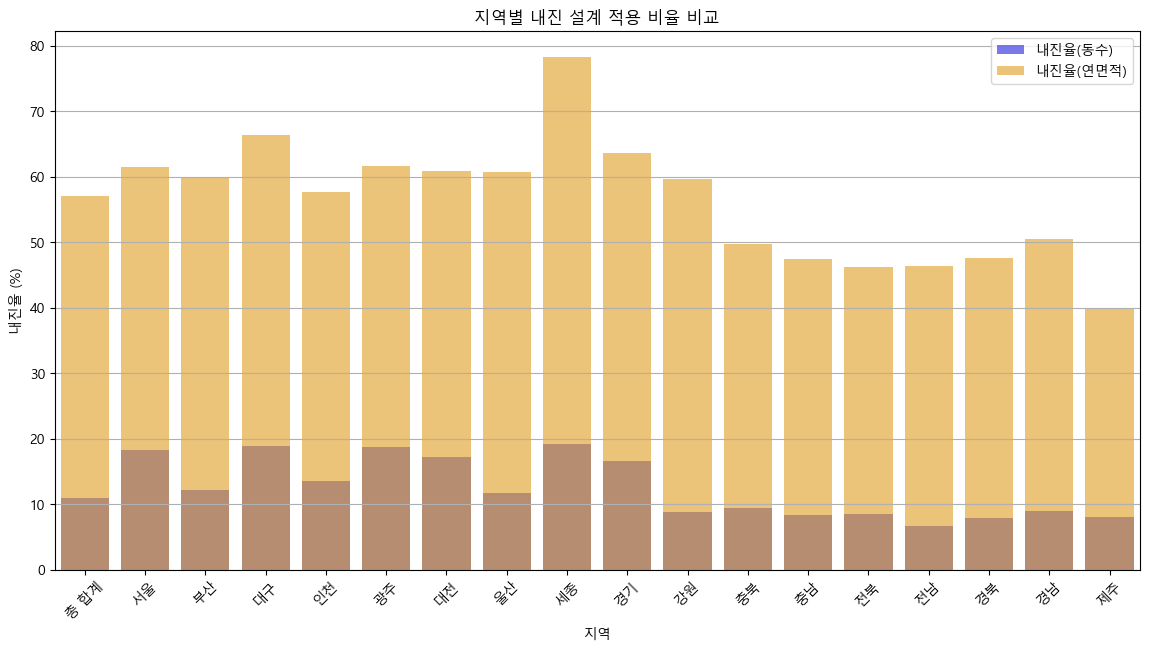

In [4]:
# 내진 설계 적용 비율 계산
df_pu['내진율(동수)'] = (df_pu['내진설계 적용(동수)'] / df_pu['전체 공공건축물(동수)']) * 100
df_pu['내진율(연면적)'] = (df_pu['내진설계 적용(연면적)'] / df_pu['전체 공공건축물(연면적)']) * 100

# 그래프 설정
plt.figure(figsize=(14, 7))

# 동수 기준 내진율 시각화
sns.barplot(x='지역', y='내진율(동수)', data=df_pu, color='blue', alpha=0.6, label='내진율(동수)')

# 연면적 기준 내진율 시각화
sns.barplot(x='지역', y='내진율(연면적)', data=df_pu, color='orange', alpha=0.6, label='내진율(연면적)')

# 그래프 제목 및 레이블 설정
plt.title('지역별 내진 설계 적용 비율 비교')
plt.xlabel('지역')
plt.ylabel('내진율 (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

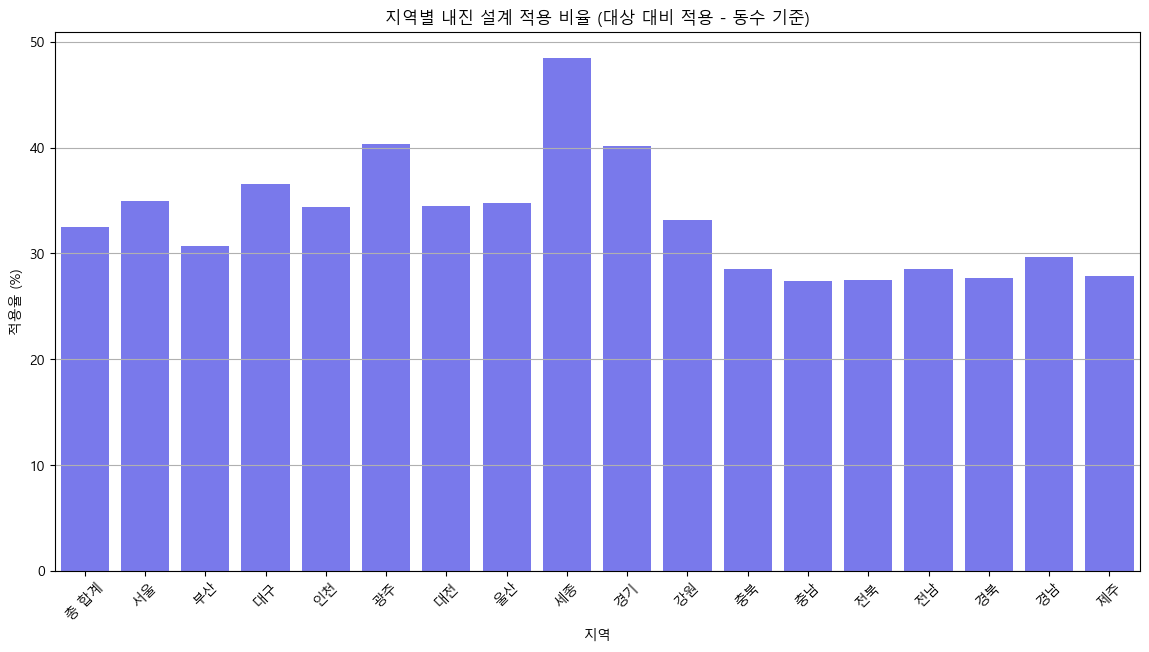

In [5]:
# 내진 설계 적용 비율 계산 (동수 기준)
df_pu['적용율(동수)'] = (df_pu['내진설계 적용(동수)'] / df_pu['내진설계 대상(동수)']) * 100

# 그래프 설정
plt.figure(figsize=(14, 7))

# 동수 기준 적용율 시각화
sns.barplot(x='지역', y='적용율(동수)', data=df_pu, color='blue', alpha=0.6)

# 그래프 제목 및 레이블 설정
plt.title('지역별 내진 설계 적용 비율 (대상 대비 적용 - 동수 기준)')
plt.xlabel('지역')
plt.ylabel('적용율 (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

2016년 까지내진설계 대상인 공공건축물 중에 실제로 내전설계과 건축물인 비율이 어떤 지역도 50%이상이 넘지 않음 -> 실제로 지진이 크게 온다면 피해가 있을 수 있는 상황, 특히 지진이 자주 발생하는 경북, 실제로 크게 지진이 났던 포항, 경주 쪽은 공공건축물이 내진설계가 잘 되지 않았다.

##### 공공주택 내진설계 분석

In [6]:
df_pr = pd.read_csv('..\dataset\EDA후 데이터셋\대책현황\내진설계\국내주택_내진설계현황_EDA.csv')
df_pr

C:\Users\mkmy7\AppData\Local\Temp\ipykernel_19184\3631547316.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pr = pd.read_csv('..\dataset\EDA후 데이터셋\대책현황\내진설계\국내주택_내진설계현황_EDA.csv')


,대지위치,준공일,지상층수,지하층수,주용도,층대표용도,연면적,내진설계 대상여부
0,서울특별시 종로구 구기동 221번지,19861024.0,3.0,1.0,공동주택,연립주택,1151.90,O
1,서울특별시 종로구 사직동 311-23번지,19931224.0,2.0,1.0,공동주택,다세대주택,197.97,X
2,서울특별시 종로구 부암동 129-10번지,20030617.0,3.0,2.0,공동주택,다세대주택,745.94,O
3,서울특별시 종로구 구기동 97번지,19890215.0,2.0,1.0,공동주택,다세대주택,441.04,X
4,서울특별시 종로구 원서동 103번지,19961113.0,4.0,1.0,공동주택,다세대주택,667.69,O
...,...,...,...,...,...,...,...,...
256787,제주특별자치도 서귀포시 대정읍 하모리 470-1번지,19930608,4.0,0.0,공동주택,다세대주택,659.12,O
256788,제주특별자치도 서귀포시 남원읍 하례리 349-5번지,20020207,3.0,0.0,공동주택,다세대주택,652.08,O
256789,제주특별자치도 서귀포시 남원읍 남원리 1323-2번지,19961031,5.0,0.0,공동주택,아파트,3350.00,O
256790,제주특별자치도 서귀포시 남원읍 하례리 1336-1번지,19961126,3.0,0.0,공동주택,기숙사,592.62,O


In [7]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256792 entries, 0 to 256791
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   대지위치       256791 non-null  object 
 1   준공일        255323 non-null  object 
 2   지상층수       256788 non-null  float64
 3   지하층수       256788 non-null  float64
 4   주용도        256754 non-null  object 
 5   층대표용도      256788 non-null  object 
 6   연면적        256788 non-null  float64
 7   내진설계 대상여부  256788 non-null  object 
dtypes: float64(3), object(5)
memory usage: 15.7+ MB


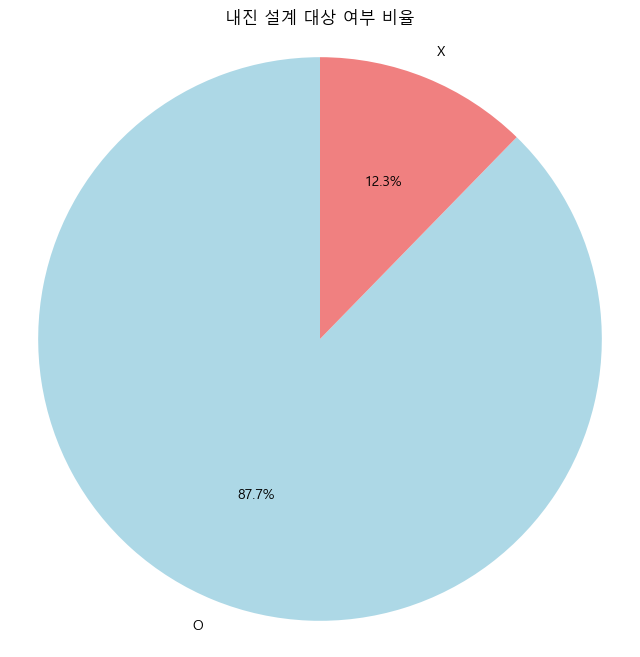

In [10]:
# 내진 설계 대상 여부 비율 계산
target_counts = df_pr['내진설계 대상여부'].value_counts()
target_counts
# 파이 차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('내진 설계 대상 여부 비율')
plt.axis('equal')  # 원형으로 유지
plt.show()